In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
df_train = pd.read_csv("../datasets/train.csv")
df_test = pd.read_csv("../datasets/test.csv")

In [3]:
df_train.head()

,text,category
0,I am still waiting on my card?,card_arrival
1,What can I do if my card still hasn't arrived ...,card_arrival
2,I have been waiting over a week. Is the card s...,card_arrival
3,Can I track my card while it is in the process...,card_arrival
4,"How do I know if I will get my card, or if it ...",card_arrival


In [4]:
df_test.head()

,text,category
0,How do I locate my card?,card_arrival
1,"I still have not received my new card, I order...",card_arrival
2,I ordered a card but it has not arrived. Help ...,card_arrival
3,Is there a way to know when my card will arrive?,card_arrival
4,My card has not arrived yet.,card_arrival


In [5]:
df_train.isnull().sum()

text        0
category    0
dtype: int64

In [6]:
df_test.isnull().sum()

text        0
category    0
dtype: int64

In [7]:
df_train["category"].unique()

array(['card_arrival', 'card_linking', 'exchange_rate',
       'card_payment_wrong_exchange_rate', 'extra_charge_on_statement',
       'pending_cash_withdrawal', 'fiat_currency_support',
       'card_delivery_estimate', 'automatic_top_up', 'card_not_working',
       'exchange_via_app', 'lost_or_stolen_card', 'age_limit',
       'pin_blocked', 'contactless_not_working',
       'top_up_by_bank_transfer_charge', 'pending_top_up',
       'cancel_transfer', 'top_up_limits',
       'wrong_amount_of_cash_received', 'card_payment_fee_charged',
       'transfer_not_received_by_recipient',
       'supported_cards_and_currencies', 'getting_virtual_card',
       'card_acceptance', 'top_up_reverted',
       'balance_not_updated_after_cheque_or_cash_deposit',
       'card_payment_not_recognised', 'edit_personal_details',
       'why_verify_identity', 'unable_to_verify_identity',
       'get_physical_card', 'visa_or_mastercard', 'topping_up_by_card',
       'disposable_card_limits', 'compromised_card

In [8]:
df_train["category"].value_counts()

category
card_payment_fee_charged                            187
direct_debit_payment_not_recognised                 182
balance_not_updated_after_cheque_or_cash_deposit    181
wrong_amount_of_cash_received                       180
cash_withdrawal_charge                              177
                                                   ... 
lost_or_stolen_card                                  82
card_swallowed                                       61
card_acceptance                                      59
virtual_card_not_working                             41
contactless_not_working                              35
Name: count, Length: 77, dtype: int64

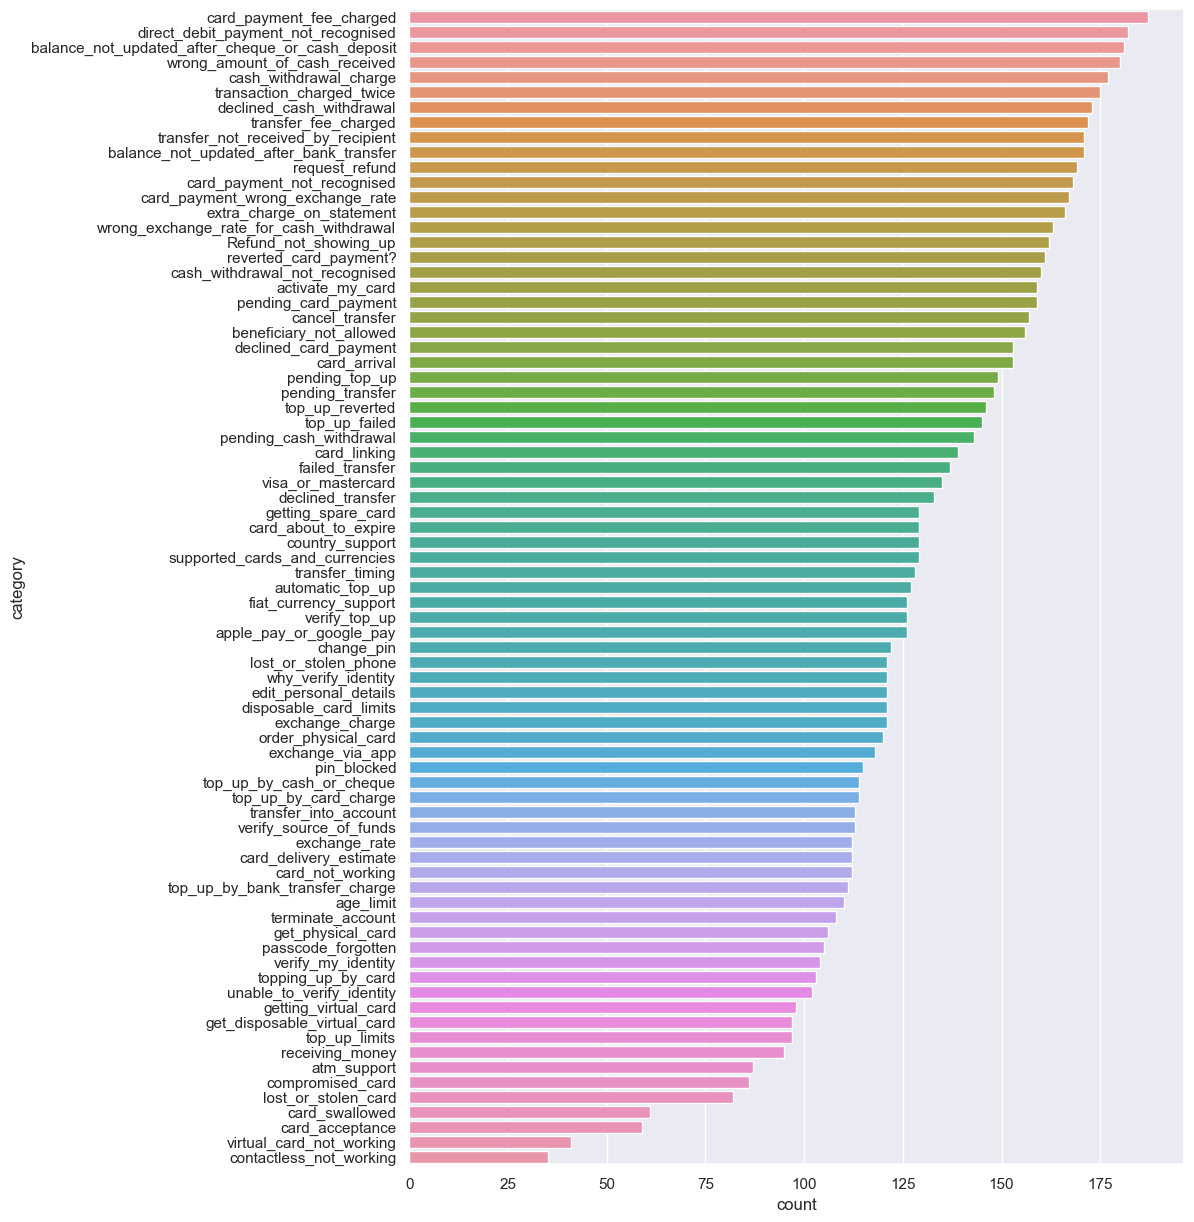

In [9]:
sns.set_theme(rc={"figure.figsize":(10, 15)})
sns.countplot(data=df_train, y="category", order=df_train['category'].value_counts().index)
plt.show()

### Wordcloud
Top 200 frequent words in the data

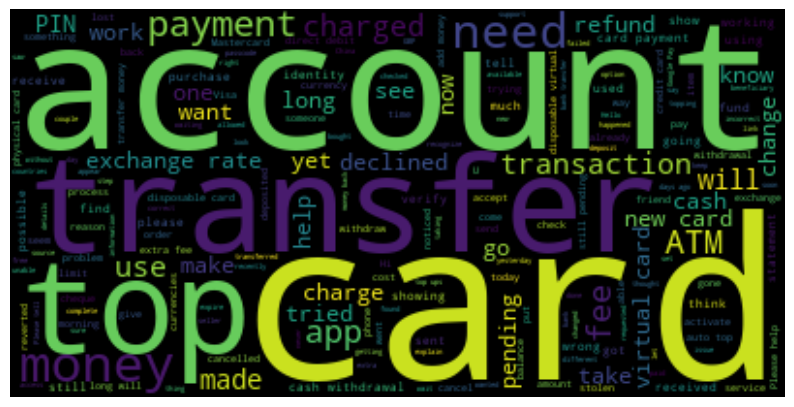

In [14]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=STOPWORDS).generate(" ".join(df_train["text"].tolist()))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [10]:
df_train = df_train.sample(frac = 1)
train_data = df_train['text'].to_numpy()
test_data = df_test['text'].to_numpy()

In [11]:
vocab_size = 5000 # params
oov_tok = '<OOV>'

In [12]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_data)

In [13]:
train_sequences = tokenizer.texts_to_sequences(train_data)
test_sequences = tokenizer.texts_to_sequences(test_data)

In [14]:
max_length = 50 # params
trunc_type = 'post'
padding_type = 'post'

In [15]:
x_train = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

x_test = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


In [16]:
train_labels = pd.Categorical(df_train['category']).codes
test_labels = pd.Categorical(df_test['category']).codes

In [17]:
y_train = train_labels.reshape((10003,1))
y_test = test_labels.reshape((3080,1))

In [18]:
partial_x_train = x_train[:9000]
partial_y_train = y_train[:9000]

x_val = x_train[9000:]
y_val = y_train[9000:]

In [19]:
embedding_dim = 64

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    tf.keras.layers.Dense(77, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          320000    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 77)                5005      
                                                                 
Total params: 399,309
Trainable params: 399,309
Non-trainable params: 0
_________________________________________________________________


2024-04-23 16:51:08.039515: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-23 16:51:08.040317: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-23 16:51:08.040834: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [20]:
# Write the code to set the training configuration here.

opt = tf.optimizers.Adam(learning_rate=1e-2)

model.compile(
                loss='sparse_categorical_crossentropy', optimizer=opt, 
                metrics=['accuracy'#, tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), #'categorical_accuracy'#,
                        #  tf.keras.metrics.F1Score(threshold=0.5)
                         ]
            )


In [21]:
callbacks = []

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=10,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0
)

callbacks.append(early_stop)

lr_callback = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    verbose=0,
    mode='auto',
    min_delta=0.0001,
    cooldown=0,
    min_lr=0.0,
)

callbacks.append(lr_callback)

In [22]:
# Write the code to fit the model with the partial training dataset here.
num_epochs = 100

history = model.fit(partial_x_train, partial_y_train, epochs=num_epochs, validation_data=(x_val, y_val), verbose=1, callbacks=callbacks)


Epoch 1/100


2024-04-23 16:51:08.165904: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-04-23 16:51:08.267080: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-23 16:51:08.267924: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-23 16:51:08.268504: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG IN

281/282 [============================>.] - ETA: 0s - loss: 2.6901 - accuracy: 0.2810

2024-04-23 16:51:12.990989: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-23 16:51:12.991899: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-23 16:51:12.992622: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

282/282 [==============================] - 5s 15ms/step - loss: 2.6891 - accuracy: 0.2811 - val_loss: 1.3173 - val_accuracy: 0.6261 - lr: 0.0100
Epoch 2/100
282/282 [==============================] - 4s 13ms/step - loss: 0.8637 - accuracy: 0.7383 - val_loss: 0.8300 - val_accuracy: 0.7717 - lr: 0.0100
Epoch 3/100
282/282 [==============================] - 4s 13ms/step - loss: 0.4647 - accuracy: 0.8588 - val_loss: 0.7665 - val_accuracy: 0.8146 - lr: 0.0100
Epoch 4/100
282/282 [==============================] - 4s 13ms/step - loss: 0.3272 - accuracy: 0.8964 - val_loss: 0.7251 - val_accuracy: 0.8315 - lr: 0.0100
Epoch 5/100
282/282 [==============================] - 4s 13ms/step - loss: 0.2670 - accuracy: 0.9180 - val_loss: 0.8939 - val_accuracy: 0.8066 - lr: 0.0100
Epoch 6/100
282/282 [==============================] - 4s 13ms/step - loss: 0.2358 - accuracy: 0.9297 - val_loss: 0.9156 - val_accuracy: 0.8126 - lr: 0.0100
Epoch 7/100
282/282 [==============================] - 4s 13ms/step - 

In [23]:
# Write the code to set the training configuration here.

opt = tf.optimizers.Adam(learning_rate=1e-2)

model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

callbacks = []

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=10,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0
)

callbacks.append(early_stop)

lr_callback = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    verbose=0,
    mode='auto',
    min_delta=0.0001,
    cooldown=0,
    min_lr=0.0,
)

callbacks.append(lr_callback)

# Write the code to fit the model with the partial training dataset here.
num_epochs = 100

history = model.fit(x_train, y_train, epochs=num_epochs, verbose=1, validation_data=(x_test, y_test), callbacks=callbacks)


Epoch 1/100


2024-04-23 16:52:03.155245: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-23 16:52:03.156544: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-23 16:52:03.157363: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

310/313 [============================>.] - ETA: 0s - loss: 0.3621 - accuracy: 0.8978

2024-04-23 16:52:08.568605: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-23 16:52:08.569323: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-23 16:52:08.570007: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

313/313 [==============================] - 6s 16ms/step - loss: 0.3629 - accuracy: 0.8976 - val_loss: 0.7031 - val_accuracy: 0.8292 - lr: 0.0100
Epoch 2/100
313/313 [==============================] - 4s 14ms/step - loss: 0.2499 - accuracy: 0.9223 - val_loss: 0.7785 - val_accuracy: 0.8279 - lr: 0.0100
Epoch 3/100
313/313 [==============================] - 4s 14ms/step - loss: 0.2309 - accuracy: 0.9291 - val_loss: 0.7431 - val_accuracy: 0.8338 - lr: 0.0100
Epoch 4/100
313/313 [==============================] - 5s 14ms/step - loss: 0.2330 - accuracy: 0.9312 - val_loss: 0.8192 - val_accuracy: 0.8312 - lr: 0.0100
Epoch 5/100
313/313 [==============================] - 5s 15ms/step - loss: 0.1126 - accuracy: 0.9662 - val_loss: 0.7541 - val_accuracy: 0.8529 - lr: 1.0000e-03
Epoch 6/100
313/313 [==============================] - 5s 14ms/step - loss: 0.0519 - accuracy: 0.9863 - val_loss: 0.7516 - val_accuracy: 0.8575 - lr: 1.0000e-03
Epoch 7/100
313/313 [==============================] - 5s 15ms

In [24]:
# embedding_dim = 64 # params

# model = tf.keras.Sequential([
#     tf.keras.layers.Embedding(vocab_size, embedding_dim),
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
#     tf.keras.layers.Dense(embedding_dim, activation='relu'),
#     tf.keras.layers.Dense(77, activation='softmax')
# ])

model_1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(embedding_dim, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.LSTM(embedding_dim),
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    tf.keras.layers.Dense(77, activation='softmax')
])

model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 64)            320000    
                                                                 
 dropout (Dropout)           (None, 50, 64)            0         
                                                                 
 conv1d (Conv1D)             (None, 46, 64)            20544     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 11, 64)           0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                      

2024-04-23 16:52:55.718034: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-23 16:52:55.718697: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-23 16:52:55.719104: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [25]:
# Write the code to set the training configuration here.

opt = tf.optimizers.Adam(learning_rate=1e-2)

model_1.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

callbacks = []

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=10,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0
)

callbacks.append(early_stop)

lr_callback = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    verbose=0,
    mode='auto',
    min_delta=0.0001,
    cooldown=0,
    min_lr=0.0,
)

callbacks.append(lr_callback)

# Write the code to fit the model with the partial training dataset here.
num_epochs = 100

history = model_1.fit(partial_x_train, partial_y_train, epochs=num_epochs, verbose=1, validation_data=(x_val, y_val), callbacks=callbacks)


Epoch 1/100


2024-04-23 16:52:55.858131: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-23 16:52:55.859023: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-23 16:52:55.859605: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

282/282 [==============================] - 3s 7ms/step - loss: 3.7329 - accuracy: 0.0477 - val_loss: 3.2581 - val_accuracy: 0.0738 - lr: 0.0100
Epoch 2/100
  1/282 [..............................] - ETA: 1s - loss: 3.3861 - accuracy: 0.1250

2024-04-23 16:52:58.442029: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-23 16:52:58.442609: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-23 16:52:58.443203: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

282/282 [==============================] - 2s 7ms/step - loss: 2.7829 - accuracy: 0.1592 - val_loss: 2.5404 - val_accuracy: 0.2024 - lr: 0.0100
Epoch 3/100
282/282 [==============================] - 2s 7ms/step - loss: 2.2027 - accuracy: 0.2856 - val_loss: 2.0584 - val_accuracy: 0.2991 - lr: 0.0100
Epoch 4/100
282/282 [==============================] - 2s 6ms/step - loss: 1.7918 - accuracy: 0.4054 - val_loss: 1.7218 - val_accuracy: 0.4646 - lr: 0.0100
Epoch 5/100
282/282 [==============================] - 2s 7ms/step - loss: 1.4815 - accuracy: 0.5031 - val_loss: 1.4409 - val_accuracy: 0.5464 - lr: 0.0100
Epoch 6/100
282/282 [==============================] - 2s 7ms/step - loss: 1.2911 - accuracy: 0.5849 - val_loss: 1.4260 - val_accuracy: 0.5813 - lr: 0.0100
Epoch 7/100
282/282 [==============================] - 2s 6ms/step - loss: 1.1949 - accuracy: 0.6120 - val_loss: 1.4321 - val_accuracy: 0.5803 - lr: 0.0100
Epoch 8/100
282/282 [==============================] - 2s 6ms/step - loss: 1

In [26]:
# Write the code to set the training configuration here.

opt = tf.optimizers.Adam(learning_rate=1e-2)

model_1.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

callbacks = []

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=10,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0
)

callbacks.append(early_stop)

lr_callback = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    verbose=0,
    mode='auto',
    min_delta=0.0001,
    cooldown=0,
    min_lr=0.0,
)

callbacks.append(lr_callback)

# Write the code to fit the model with the partial training dataset here.
num_epochs = 100

history = model_1.fit(x_train, y_train, epochs=num_epochs, verbose=1, validation_data=(x_test, y_test), callbacks=callbacks)


Epoch 1/100


2024-04-23 16:54:14.784439: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-23 16:54:14.785190: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-23 16:54:14.785709: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

312/313 [============================>.] - ETA: 0s - loss: 0.7218 - accuracy: 0.7747

2024-04-23 16:54:17.482850: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-23 16:54:17.483599: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-23 16:54:17.484456: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

313/313 [==============================] - 3s 7ms/step - loss: 0.7215 - accuracy: 0.7747 - val_loss: 1.1029 - val_accuracy: 0.7175 - lr: 0.0100
Epoch 2/100
313/313 [==============================] - 2s 7ms/step - loss: 0.7208 - accuracy: 0.7789 - val_loss: 1.0495 - val_accuracy: 0.7175 - lr: 0.0100
Epoch 3/100
313/313 [==============================] - 2s 7ms/step - loss: 0.7183 - accuracy: 0.7789 - val_loss: 1.0132 - val_accuracy: 0.7308 - lr: 0.0100
Epoch 4/100
313/313 [==============================] - 2s 7ms/step - loss: 0.7181 - accuracy: 0.7780 - val_loss: 1.0940 - val_accuracy: 0.7224 - lr: 0.0100
Epoch 5/100
313/313 [==============================] - 2s 7ms/step - loss: 0.7293 - accuracy: 0.7762 - val_loss: 1.0433 - val_accuracy: 0.7214 - lr: 0.0100
Epoch 6/100
313/313 [==============================] - 2s 7ms/step - loss: 0.7209 - accuracy: 0.7837 - val_loss: 1.0545 - val_accuracy: 0.7263 - lr: 0.0100
Epoch 7/100
313/313 [==============================] - 2s 7ms/step - loss: 0

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

test_predictions = model.predict(x_test)
test_predictions = np.argmax(test_predictions,axis=1)

97/97 [==============================] - 0s 3ms/step


In [38]:
# test_accuracy = accuracy_score(test_labels, test_predictions)
test_precision = precision_score(test_labels, test_predictions, average='macro')
test_recall = recall_score(test_labels, test_predictions, average='macro')
test_f1_score=f1_score(test_labels, test_predictions, average='macro')

In [39]:
test_precision, test_recall, test_f1_score

(0.8483622629582038, 0.8292207792207792, 0.8286285627557761)

In [40]:
test_predictions = model_1.predict(x_test)
test_predictions = np.argmax(test_predictions,axis=1)

# test_accuracy = accuracy_score(test_labels, test_predictions)
test_precision = precision_score(test_labels, test_predictions, average='macro')
test_recall = recall_score(test_labels, test_predictions, average='macro')
test_f1_score=f1_score(test_labels, test_predictions, average='macro')

test_precision, test_recall, test_f1_score

97/97 [==============================] - 0s 2ms/step


(0.7869486706221718, 0.7782467532467532, 0.7776798770526782)